In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
%matplotlib inline
%config Completer.use_jedi = False

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


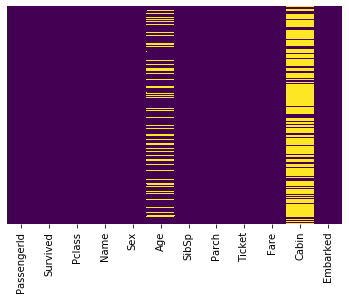

In [6]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

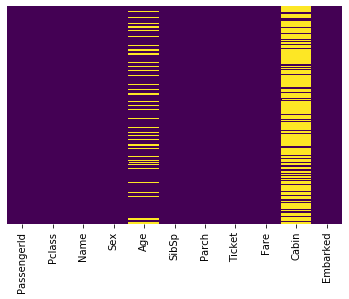

In [7]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [8]:
sns.set_style('whitegrid')

[Text(0, 0, 'Not Survive'), Text(0, 0, 'Survive')]

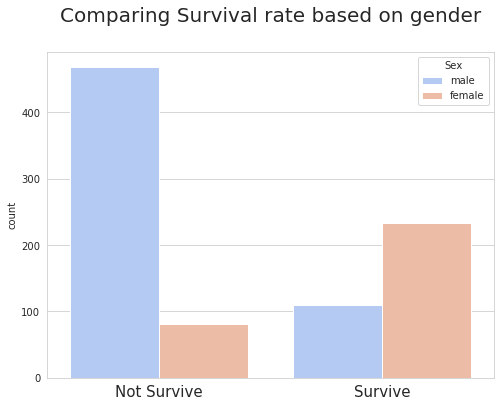

In [9]:
plt.figure(figsize=(8,6))
p1 = sns.countplot(data = train, x = 'Survived', hue = 'Sex', palette='coolwarm')
p1.set_title('Comparing Survival rate based on gender',pad=30,fontsize=20)
p1.set_xlabel('')
p1.set_xticklabels(['Not Survive','Survive'],fontsize=15)

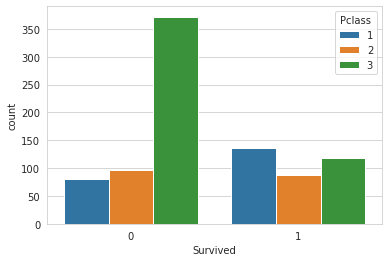

In [10]:
#To understand classwise survival rate
sns.countplot(data = train, x = 'Survived', hue = 'Pclass')
#Class 3(cheapest) survival was least

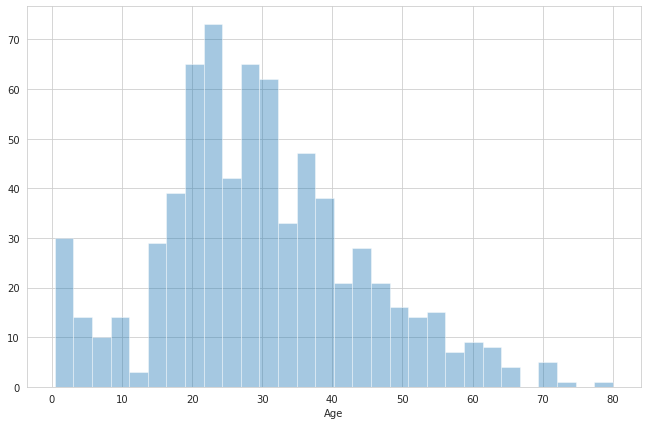

In [11]:
plt.figure(figsize=(11,7))
sns.distplot(train['Age'].dropna(), bins = 30, kde=False)
#graph skewed towards kids. More people of age group 20-30

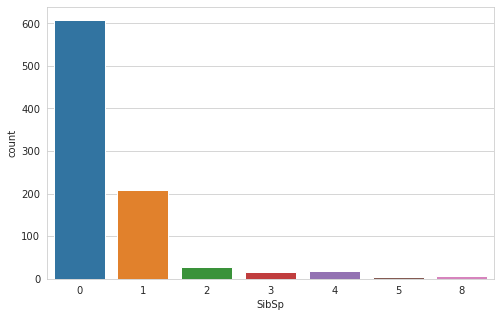

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp', data=train)
#Most people on board were travelling alone. Some were either with spouse or single parent

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train['Fare'].iplot(kind='hist',bins=80, yTitle='Fare', xTitle='No. of Tickets')
#most people on board 3rd class = cheap ticket

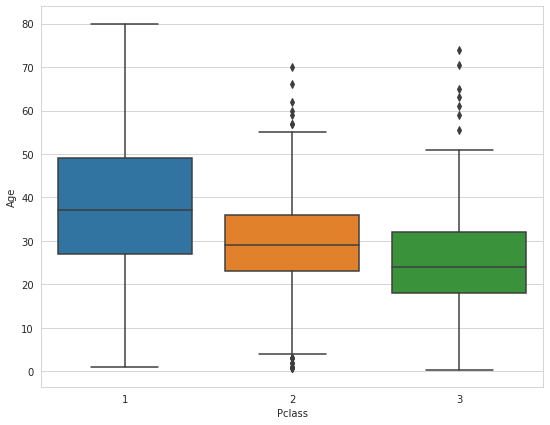

In [16]:
#Exploring Age
plt.figure(figsize=(9,7))
sns.boxplot(x='Pclass', y='Age',data=train)

In [17]:
mean_ages = train.groupby('Pclass').mean()['Age']
mean_ages

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [18]:
def fill_age(col):
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        return mean_ages[pclass]
    else:
        return age

In [19]:
#fill_age([None,1])

In [20]:
train['Age']=train[['Age','Pclass']].apply(fill_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(fill_age,axis=1)

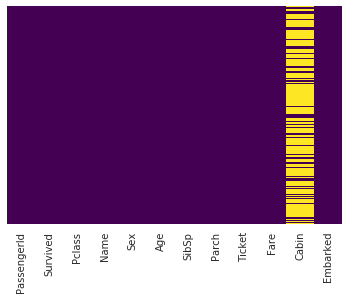

In [21]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

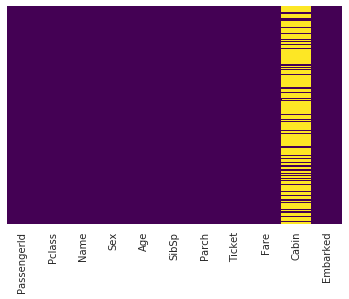

In [22]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [23]:
train.drop('Cabin',axis=1,inplace = True)
test.drop('Cabin',axis=1,inplace = True)

In [24]:
train.fillna('S',inplace=True)

In [25]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

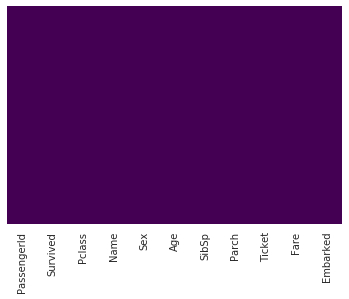

In [26]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

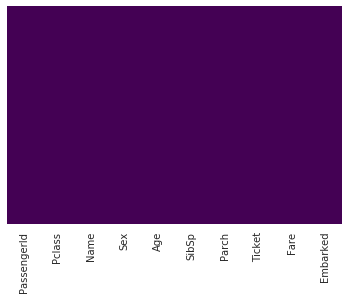

In [27]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

## Feature Engineering of Categorical Data - Dummy Var

In [28]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
males = pd.get_dummies(train['Sex'],drop_first=True)
emb = pd.get_dummies(train['Embarked'],drop_first=True)
pclss = pd.get_dummies(train['Pclass'],drop_first=True)

males2 = pd.get_dummies(test['Sex'],drop_first=True)
emb2 = pd.get_dummies(test['Embarked'],drop_first=True)
pclss2 = pd.get_dummies(test['Pclass'],drop_first=True)

In [30]:
train = pd.concat([train,emb,males,pclss],axis=1)
test = pd.concat([test,emb2,males2,pclss2],axis=1)

In [31]:
train.rename(columns = {2:'Pclass 2', 3:'Pclass 3'},inplace=True) 
test.rename(columns = {2:'Pclass 2', 3:'Pclass 3'},inplace=True) 

In [32]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,Pclass 2,Pclass 3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [33]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,Pclass 2,Pclass 3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,0,1


In [34]:
train.drop(['Name','Ticket','Embarked','Sex','Pclass'],axis=1,inplace=True)
test.drop(['Name','Ticket','Embarked','Sex','Pclass'],axis=1,inplace=True)

In [35]:
train.head(4)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Q,S,male,Pclass 2,Pclass 3
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,0


In [36]:
test.head(4)

,PassengerId,Age,SibSp,Parch,Fare,Q,S,male,Pclass 2,Pclass 3
0,892,34.5,0,0,7.8292,1,0,1,0,1
1,893,47.0,1,0,7.0000,0,1,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,1,0
3,895,27.0,0,0,8.6625,0,1,1,0,1


In [37]:
train.tail(3)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Q,S,male,Pclass 2,Pclass 3
888,889,0,25.14062,1,2,23.45,0,1,0,0,1
889,890,1,26.00000,0,0,30.00,0,0,1,0,0
890,891,0,32.00000,0,0,7.75,1,0,1,0,1


In [38]:
train.shape

(891, 11)

In [39]:
TestPass_id = test['PassengerId']
train.drop('PassengerId',axis=1,inplace = True)
test.drop('PassengerId',axis=1,inplace = True)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
std = StandardScaler()

In [42]:
train[['Age','Fare']] = std.fit_transform(train[['Age','Fare']])
test[['Age','Fare']] = std.fit_transform(test[['Age','Fare']])

In [43]:
train.head(5)

,Survived,Age,SibSp,Parch,Fare,Q,S,male,Pclass 2,Pclass 3
0,0,-0.552360,1,0,-0.502445,0,1,1,0,1
1,1,0.659475,1,0,0.786845,0,0,0,0,0
2,1,-0.249401,0,0,-0.488854,0,1,0,0,1
3,1,0.432256,1,0,0.420730,0,1,0,0,0
4,0,0.432256,0,0,-0.486337,0,1,1,0,1


In [44]:
test.head(5)

,Age,SibSp,Parch,Fare,Q,S,male,Pclass 2,Pclass 3
0,0.385368,0,0,-0.498407,1,0,1,0,1
1,1.359561,1,0,-0.513274,0,1,0,0,1
2,2.528592,0,0,-0.465088,1,0,1,1,0
3,-0.199148,0,0,-0.483466,0,1,1,0,1
4,-0.588825,1,1,-0.418471,0,1,0,0,1


# Training Model


In [45]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logMod = LogisticRegression(max_iter=1000)

In [48]:
logMod.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred = logMod.predict(test)

In [50]:
submission = pd.DataFrame({'PassengerId':TestPass_id,'Survived':pred})

In [51]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
filename = 'Titanic Predicted values file.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 3.csv


In [ ]:
#Score 0.77990